## Assignment Week 2 - Biswajit Sharma

#### Does the price of houses located inland are lower compared to houses near ocean?
#### Does the income level of a location impact house prices?

The sample dataset for this study is the California housing dataset from Kaggle (Kaggle n.d.). The dataset contains information about median housing value for city block groups in California from the 1990 California census. There are $10$ variables in the dataset as given below.

- longitude - longitude of the block group
- latitude - latitude of the block group
- housing_median_age - median age of houses in the block group in years
- total_rooms - total rooms in houses of the block group
- total_bedrooms - total bedrooms in houses of the block group
- population - population in the block group
- households - number of households in the block group
- median_income - median income of people in the block group in 10K scale
- median_house_value - median price of houses in the block group
- ocean_proximity - proximity of the block from the ocean front. This a categorical variable with categories: <1H Ocean, Inland, Island, Near Bay and Near Ocean

Houses that are near to the oceanfront provide scenic views, aesthetical appeal to buyers, more opportunities for recreation, relaxing, and enjoyable lifestyle. Therefore, it is highly likely that house price near ocean may be higher. The income level of an area may also impact house prices as higher income increases affordability, investment opportunities, and the likelihood of a better neighborhood. This study is focused on analyzing the below questions using vizualizations.

_Does the price of houses located inland are lower than houses near the ocean?_

_Does the income level of a location impact house prices?_

In [2]:
# import modules

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [3]:
#Read dataset
df = pd.read_csv("./datasets/ca_housing_prices.csv")
# df = pd.read_csv("./project/datasets/housing.csv")

In [4]:
# view few rows
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Out of the $10$ variables, the below $5$ variables are used in the study as it appears that these variables will have most impact on the problem at hand.

- housing_median_age - The age of a house is an essential factor in determining price, as newer houses will result in less maintenance, modern styles and features, and higher resale value.
- total_rooms - The total number of rooms in a house also impacts house price as more rooms provide more living area and square footage and better resale value.
- total_bedrooms - Total rooms may significantly affect house prices as more bedrooms offer many advantages for multiperson families, including more living areas and increased demand.
- median_income - The income level of an area can impact house prices as higher income increases affordability, investment opportunities, and the likelihood of a better neighborhood.
- median_house_value - This is the response or outcome variable in this study.

In [5]:
# Check of NA in columns
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

We see `total_bedrooms` column has 207 nulls. However we will not use `total_bedrooms` in this study.

In [6]:
# Drop rows having nulls in total_bedrooms column
# df = df.dropna()

#### Vizualizations

In [7]:
# compute average house prices by ocean proximity
avg_price = df.groupby("ocean_proximity").mean()

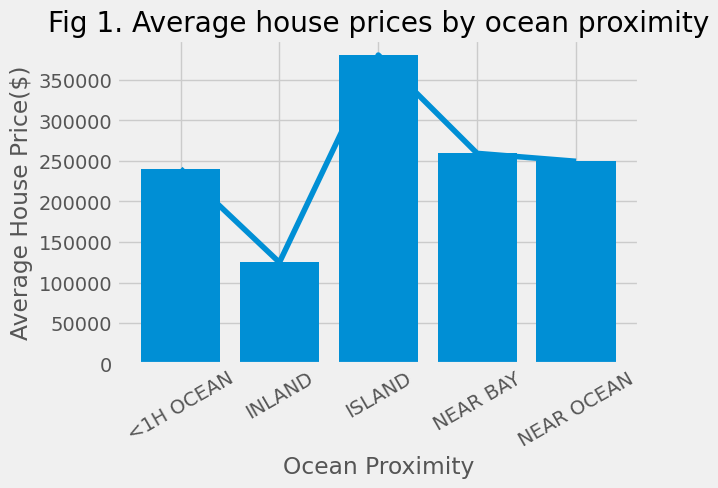

In [38]:
# plot the average price
plt.figure(figsize=(6,4))
# plt.style.use("fivethirtyeight")
plt.bar(avg_price.index, avg_price["median_house_value"])
plt.xlabel("Ocean Proximity")
plt.ylabel("Average House Price($)")
plt.xticks(rotation=30)
plt.title("Fig 1. Average house prices by ocean proximity")

plt.show()

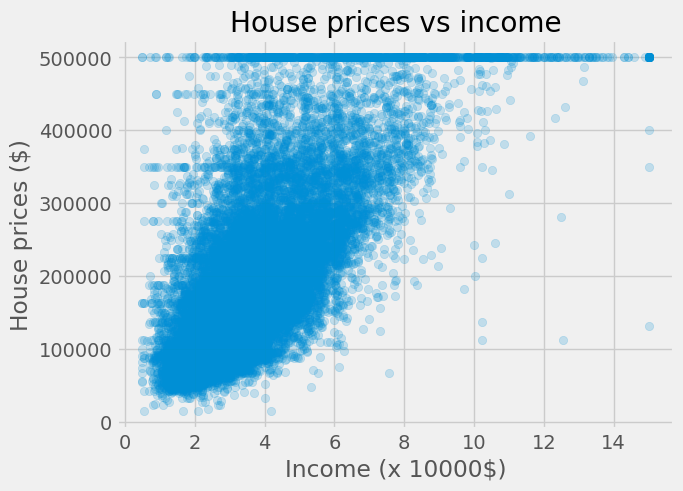

In [33]:
# scatter plot of median income and price
plt.scatter(df["median_income"], df["median_house_value"], alpha=0.2)
plt.title("Fig 2. House prices vs income")
plt.ylabel("House prices ($)")
plt.xlabel("Income (x 10000$)")
plt.show()

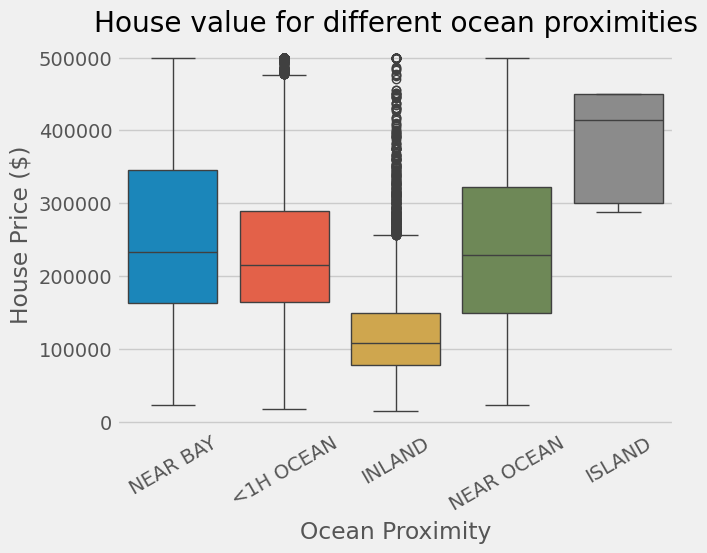

In [32]:
sns.boxplot(x=df["ocean_proximity"], y=df["median_house_value"], hue=df["ocean_proximity"])
plt.title("Fig 3. House value distribution for different ocean proximities")
plt.ylabel("House Price ($)")
plt.xlabel("Ocean Proximity")
plt.xticks(rotation=30)
plt.show()

#### Observations

From Fig 1 we see that the `average house value` for near ocean houses are higher than the `inland` located houses. Houses that are _near ocean_,_near bay area_,and _less than 1 hour from ocean_ are having similar average prices. The houses located _inland_ have **lowest** average price, while _island_ have the highest average house price.

From Fig 2, we observe that there is a _positive correlation_ between `house value` and `median income`. **As the `median income` of an area increases, the `median house value` of that area tends to increase.**

From Fig 3, we notice that the _inland_ houses have lowest median values among all the houses. The distribution of `house value` of houses located _near ocean_, _near bay area_,and _less than 1 hour from ocean_ are similar with median around 220K. However, the distribution of `house value` for houses located in _island_ is **highest** with median around 410K. We also notice that even though 75% of the _inland_ houses are prices below 150K, there are _inland_ house which have values as high as 500K and these seem like outliers.

#### Summary

From the visualizations, we notice that the average price of the houses in _near ocean_ and _island_ blocks are much higher as compared to houses located in _inland_ blocks. It is also observed that as the median income of a block increases the median house value of the block also tends to increase. Hence we can, say that the houses located _near ocean_ have tendency to be higher value than the house located _inland_. Even though we see a relationship between _median income_ and _median house value_ of a block, we can not conclude causation that the high value of houses of a block is caused by higher median income of the block.

In [35]:
# sns.scatterplot(df,x="latitude",y="longitude", hue="ocean_proximity", size="median_house_value",)
# plt.show()

In [65]:
%matplotlib inline

In [37]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe'

fig = go.Figure(data=go.Scattergeo(
        lon = df['longitude'],
        lat = df['latitude'],
        text = df['ocean_proximity'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Blues',
            cmin = 0,
            color = df['median_house_value'],
            cmax = df['median_house_value'].max(),
            colorbar_title="House prices"
        )))

fig.update_layout(
        title = 'House prices - CA',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig.update_geos(
    lataxis_range=[30,50], lonaxis_range=[-115, -125]
)

fig.show()

In [35]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

TypeError: cannot unpack non-iterable Axes object

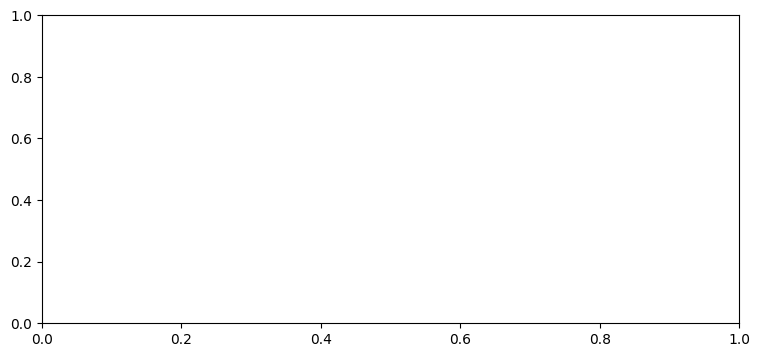

In [43]:
# boxplot of house value by proximity
near_bay = df[df["ocean_proximity"] == "NEAR BAY"]
ocean_1h = df[df["ocean_proximity"] == "<1H OCEAN"]
inland = df[df["ocean_proximity"] == "INLAND"]
near_ocean = df[df["ocean_proximity"] == "NEAR OCEAN"]
island = df[df["ocean_proximity"] == "ISLAND"]
labels = ['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
# rectangular box plot
bplot1 = ax1.boxplot([near_bay, ocean_1h, inland, near_ocean, island],
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks


# ax1.set_title('Rectangular box plot')
# fill with colors
colors = ['pink', 'lightblue', 'lightgreen', 'red', 'orange']
for bplot in (bplot1):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

In [7]:
# create a subset with only 5 explanatory variables and the outcome variable
explanatory_variables = ["housing_median_age", "total_rooms", "total_bedrooms", "median_income", "median_house_value"]
df_subset = df[explanatory_variables]
df_subset["ocean_proximity"] = df["ocean_proximity"]

#### Histogram of 5 variables

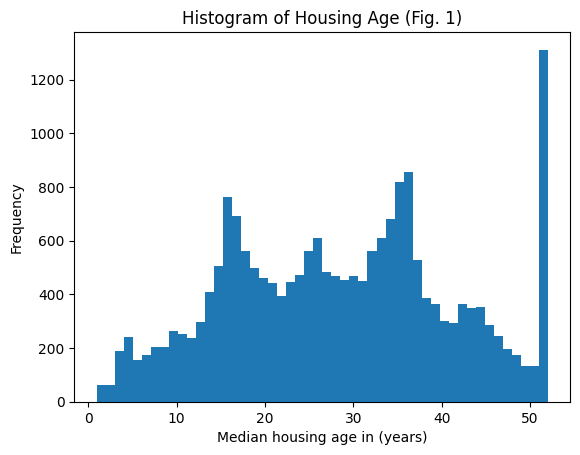

In [8]:
df_subset["housing_median_age"].plot.hist(bins=50)
plt.title("Histogram of Housing Age (Fig. 1)")
plt.xlabel("Median housing age in (years)")
plt.ylabel("Frequency")
plt.show()

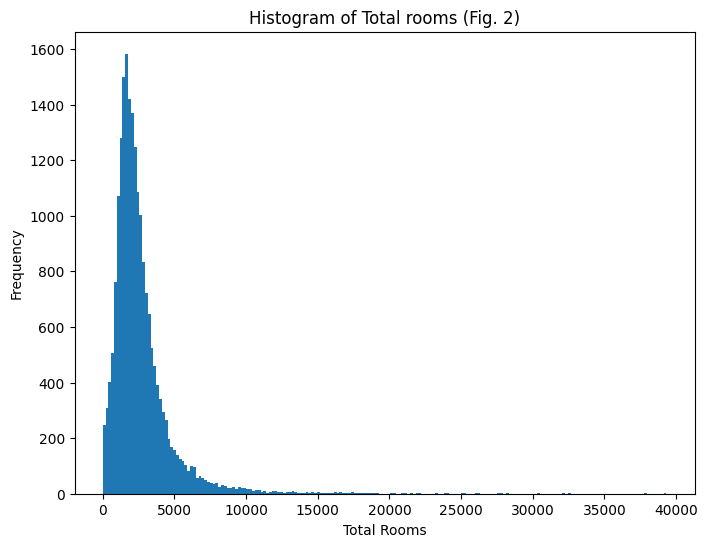

In [9]:
df_subset["total_rooms"].plot.hist(bins=200, figsize=(8,6))
plt.title("Histogram of Total rooms (Fig. 2)")
plt.xlabel("Total Rooms")
plt.ylabel("Frequency")
plt.show()

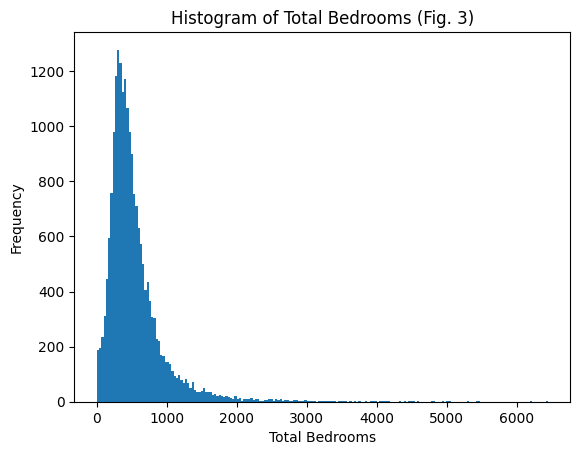

In [10]:
df_subset["total_bedrooms"].plot.hist(bins=200)
plt.title("Histogram of Total Bedrooms (Fig. 3)")
plt.xlabel("Total Bedrooms")
plt.ylabel("Frequency")
plt.show()

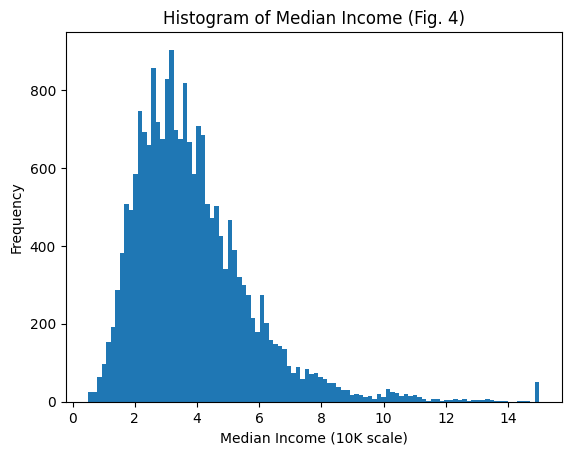

In [11]:
df_subset["median_income"].plot.hist(bins=100)
plt.title("Histogram of Median Income (Fig. 4)")
plt.xlabel("Median Income (10K scale)")
plt.ylabel("Frequency")
plt.show()

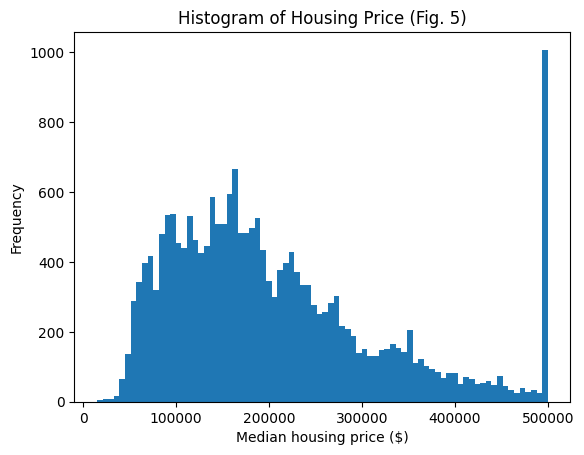

In [12]:
df_subset["median_house_value"].plot.hist(bins=80)
plt.title("Histogram of Housing Price (Fig. 5)")
plt.xlabel("Median housing price ($)")
plt.ylabel("Frequency")
plt.show()

### Outliers

In [13]:
# Check top 10 smallest values of these 5 explanatory variables
for cols in explanatory_variables:
    print(f"============== {cols} =================")
    for col_name, freq in thinkstats2.Hist(df_subset[cols]).Smallest(10):
        print(col_name, freq)    

============== housing_median_age =================
1.0 4
2.0 58
3.0 62
4.0 190
5.0 242
6.0 157
7.0 173
8.0 203
9.0 204
10.0 263
============== total_rooms =================
2.0 1
6.0 1
8.0 1
11.0 1
12.0 1
15.0 2
16.0 1
18.0 4
19.0 2
20.0 2
============== total_bedrooms =================
1.0 1
2.0 2
3.0 5
4.0 7
5.0 6
6.0 5
7.0 6
8.0 8
9.0 7
10.0 8
============== median_income =================
0.4999 12
0.536 10
0.5495 1
0.6433 1
0.6775 1
0.6825 1
0.6831 1
0.696 1
0.6991 1
0.7007 1
============== median_house_value =================
14999.0 4
17500.0 1
22500.0 4
25000.0 1
26600.0 1
26900.0 1
27500.0 1
28300.0 1
30000.0 2
32500.0 4


In [14]:
# Check top 10 largest values these 5 variables
for cols in ["housing_median_age", "total_rooms", "total_bedrooms", "median_income", "median_house_value"]:
    print(f"============== {cols} =================")
    for col_name, freq in thinkstats2.Hist(df[cols]).Largest(10):
        print(col_name, freq)

============== housing_median_age =================
52.0 1265
51.0 47
50.0 135
49.0 133
48.0 174
47.0 195
46.0 245
45.0 286
44.0 353
43.0 351
============== total_rooms =================
39320.0 1
37937.0 1
32627.0 1
32054.0 1
30450.0 1
30405.0 1
30401.0 1
28258.0 1
27870.0 1
27700.0 1
============== total_bedrooms =================
6445.0 1
6210.0 1
5471.0 1
5419.0 1
5290.0 1
5033.0 1
5027.0 1
4957.0 1
4952.0 1
4819.0 1
============== median_income =================
15.0001 48
15.0 2
14.9009 1
14.5833 1
14.4219 1
14.4113 1
14.2959 1
14.2867 1
13.947 1
13.8556 1
============== median_house_value =================
500001.0 958
500000.0 27
499100.0 1
499000.0 1
498800.0 1
498700.0 1
498600.0 1
498400.0 1
497600.0 1
497400.0 1


Frome the above histograms (Fig 1 through 5) and tail values, we observe that:

- Total rooms above $25$K seem like outliers. The total bedrooms variable has a maximum of 6.4K (Fig 3), so assuming that there can be a maximum of two baths and one living room for every one-bedroom house, anything greater than 25K looks like an outlier.

- Total rooms below $50*3=150$ looks unrealistic for an entire block assuming that 1 bedroom house will have at least 1 living room and 1 bathroom.

- Total rooms below $50*3=150$ look unrealistic for an entire block assuming that one bedroom house will have at least one living room and one bathroom.

- Median house value below $50$K looks unrealistic in California and probably are outliers. From Fig 5, we see many data points for house values greater than 500K. This might be a measurement error, and dropping such data points may be better.

- Median income below $5K$ looks unrealistic in California based on the US median income of ~74K and is probably an outlier.

The histograms (Fig 1 through 5) show that the `median housing age` variable is multimodal and the `median house value` variable is right skewed.

#### Descriptive stats: Mean mode spread and tails

In [15]:
for cols in explanatory_variables:
    stats = df_subset[cols].describe()
    print(f"Descriptive statistics for column : {cols}")
    print("============================================")
    print(f"Mean: {stats['mean']:.2f}")
    print(f"Medain: {stats['50%']:.2f}")
    print(f"Mode: {df[cols].mode()[0]}")
    print(f"variance: {np.square(stats['std']):.2f}")
    print(f"Standard Deviation: {stats['std']:.2f}")
    print(f"First Quartile: {stats['25%']:.2f}")
    print(f"Third Quartile: {stats['75%']:.2f}")
    print(f"Mininimum Value (tail): {stats['min']:.2f}")
    print(f"Maximum Value (tails): {stats['max']:.2f}")
    print("--------------------------------------------")

Descriptive statistics for column : housing_median_age
Mean: 28.63
Medain: 29.00
Mode: 52.0
variance: 158.55
Standard Deviation: 12.59
First Quartile: 18.00
Third Quartile: 37.00
Mininimum Value (tail): 1.00
Maximum Value (tails): 52.00
--------------------------------------------
Descriptive statistics for column : total_rooms
Mean: 2636.50
Medain: 2127.00
Mode: 1527.0
variance: 4775403.08
Standard Deviation: 2185.27
First Quartile: 1450.00
Third Quartile: 3143.00
Mininimum Value (tail): 2.00
Maximum Value (tails): 39320.00
--------------------------------------------
Descriptive statistics for column : total_bedrooms
Mean: 537.87
Medain: 435.00
Mode: 280.0
variance: 177565.38
Standard Deviation: 421.39
First Quartile: 296.00
Third Quartile: 647.00
Mininimum Value (tail): 1.00
Maximum Value (tails): 6445.00
--------------------------------------------
Descriptive statistics for column : median_income
Mean: 3.87
Medain: 3.54
Mode: 3.125
variance: 3.61
Standard Deviation: 1.90
First Qua

#### Handling Outliers

We are going to **drop** rows having the outliers as outliers will tend to skew the distribution and adversely impact analysis outcome.

In [16]:
# drop any rows with total bedrooms outside 150-25000 range
df_subset = df_subset[(df_subset["total_rooms"] > 150) & (df["total_rooms"] <= 25000)]
df_subset.shape

(20226, 6)

In [17]:
# drop any rows with total bedrooms greater than 50
df_subset = df_subset[df_subset["total_bedrooms"] > 50]
df_subset.shape

(20120, 6)

In [18]:
# drop any rows with median income less than 5K
df_subset = df_subset[df_subset["median_income"] >= 0.5]
df_subset.shape

(20113, 6)

In [19]:
# drop any rows with median house value outside 50-500K range
df_subset = df_subset[(df_subset["median_house_value"] >= 50000) & (df_subset["median_house_value"] <= 500000)]
df_subset = df_subset.reset_index(drop=True)
df_subset.shape

(18994, 6)

#### Comparing house prices for houses that are `near ocean` to houses that are `inland` using PMF

In [20]:
# create a near_ocean dataframe keeping only rows that are near ocean
near_ocean = df_subset[df_subset["ocean_proximity"] == "NEAR OCEAN"]
# create a inland dataframe keeping only rows that are inland
inland = df_subset[df_subset["ocean_proximity"] == "INLAND"]

In [21]:
# create a PMF of median_house_value for near ocean houses
near_ocean_pmf = thinkstats2.Pmf(near_ocean["median_house_value"], label="near_ocean")

In [22]:
# create a PMF of median_house_value for near inland houses
inland_pmf = thinkstats2.Pmf(inland["median_house_value"], label="inland" )

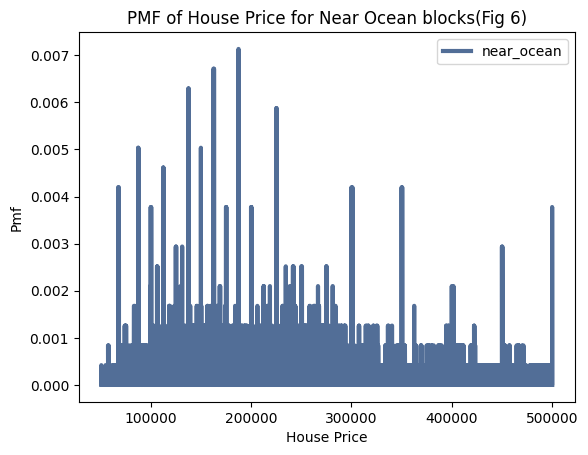

In [23]:
# plot the near ocean PMF using author's module
thinkplot.Pmf(near_ocean_pmf)
thinkplot.Config(xlabel="House Price", ylabel="Pmf", title="PMF of House Price for Near Ocean blocks(Fig 6)")

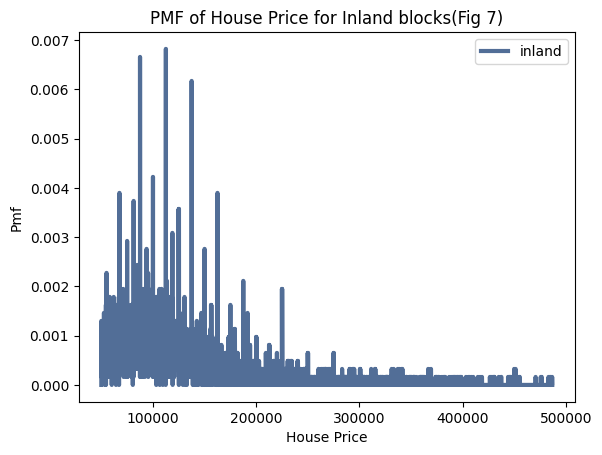

In [24]:
# plot the inland PMF using author's module
thinkplot.Pmf(inland_pmf)
thinkplot.Config(xlabel="House Price", ylabel="Pmf", title="PMF of House Price for Inland blocks(Fig 7)")

From the PMF plots (Fig 6 and 7), it is apparent that there are large of number of houses with lower prices for `inland` category than `near ocean`.

#### CDF of `near ocean` and `inland` House prices

In [25]:
# create CDF of near ocean and inland house prices using author's module
near_ocean_cdf = thinkstats2.Cdf(near_ocean["median_house_value"], label="near ocean")
inland_cdf = thinkstats2.Cdf(inland["median_house_value"], label="inland")

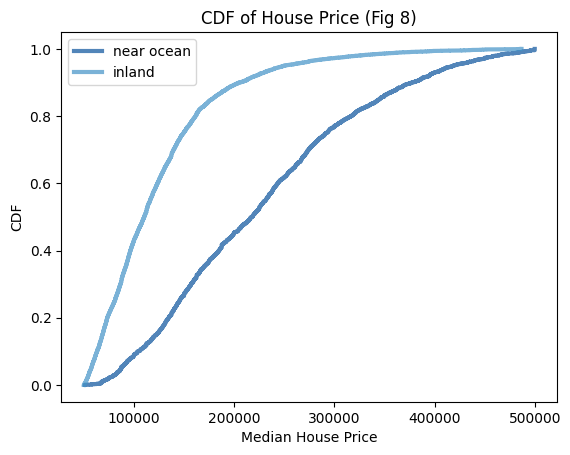

In [26]:
# plot CDF of near ocean and inland house price using author's module
thinkplot.PrePlot(2)
thinkplot.Cdfs([near_ocean_cdf, inland_cdf])
thinkplot.Config(xlabel="Median House Price", ylabel="CDF",title="CDF of House Price (Fig 8)")

In [27]:
near_ocean_cdf.Value(0.9)

377300.0

In [28]:
inland_cdf.Value(0.9)

205100.0

From Fig 8, we see that house prices of `inland` houses are lower than those are `near ocean`. The CDF also show that $90$% of houses are having value less than or equal to $377$K for near ocean as compared to $205$K for inland houses. This helps to adress our hypothesis that _house price for inland located houses are lower compared to houses near ocean_.

#### Analytical distributions

In [29]:
#get the mean (mu) of housing value
mean_housing_value = np.mean(df_subset["median_house_value"])

print(f"The mean housing value is {mean_housing_value}") 

The mean housing value is 194121.72264925766


In [30]:
#get the standard deviation(sigma) of housing value
std_housing_value = np.std(df["median_house_value"])

print(f"The mean housing value is {std_housing_value}")

The mean housing value is 115432.84232788176


In [31]:
#use author's RenderNormalCdf to generate data points from a normal cdf with particular mu and sigma

xmin = mean_housing_value - 4 * std_housing_value
xmax = mean_housing_value + 4 * std_housing_value
xs, ps = thinkstats2.RenderNormalCdf(mu=mean_housing_value, sigma=std_housing_value, low=xmin, high=xmax)

In [32]:
#create CDF of the house price
cdf = thinkstats2.Cdf(df_subset["median_house_value"], label="data")

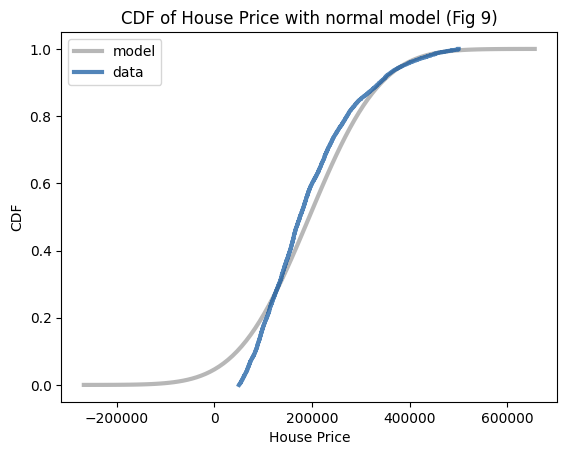

In [33]:
# Plot the normal cdf and the house price cdf in a single plot using author's module
thinkplot.Plot(xs, ps, label="model", color="0.6")
thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
thinkplot.Config(title="CDF of House Price with normal model (Fig 9)", xlabel="House Price", ylabel="CDF")

We see that the _Normal_ distribution is not a good match with the housing value as the plots are not aligning with each other.

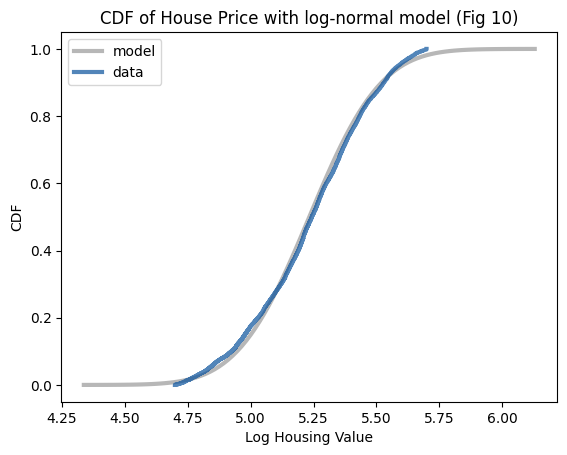

In [34]:
# get log of house price
log_housing_value = np.log10(df_subset["median_house_value"])

# get mu and sigma for the log house price series
mean_housing_value = np.mean(log_housing_value)
std_housing_value = np.std(log_housing_value)

#use author's RenderNormalCdf to generate data points from a normal cdf with particular mu and sigma
xmin = mean_housing_value - 4 * std_housing_value
xmax = mean_housing_value + 4 * std_housing_value
xs, ps = thinkstats2.RenderNormalCdf(mu=mean_housing_value, sigma=std_housing_value, low=xmin, high=xmax)

# Plot the normal cdf and the log house price cdf in a single plot using author's module
cdf = thinkstats2.Cdf(log_housing_value, label="data")
thinkplot.Plot(xs, ps, label="model", color="0.6")
thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
thinkplot.Config(title="CDF of House Price with log-normal model (Fig 10)", xlabel="Log Housing Value", ylabel="CDF")

The **log normal** model is a much better _analytical distribution_ to fit the data. There is however some discrepancy in the _data_ and _model_ above $90$th percentile and below $20$th percentile.

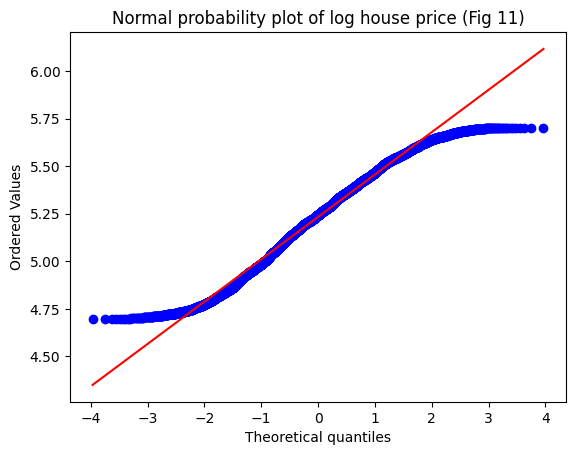

In [35]:
# Normal probability plot of log of the house price
scipy.stats.probplot(log_housing_value, plot=plt)
plt.title("Normal probability plot of log house price (Fig 11)")
plt.show()

The normal probability plot in Fig 11 shows that the log normal model describes the house prices well within few standard deviations from the mean but not in the tails. The plot only aligns with the normal line (red) within -2 to +2 standard deviation of the mean, but not in the tails.

#### Scatter plots and correlation

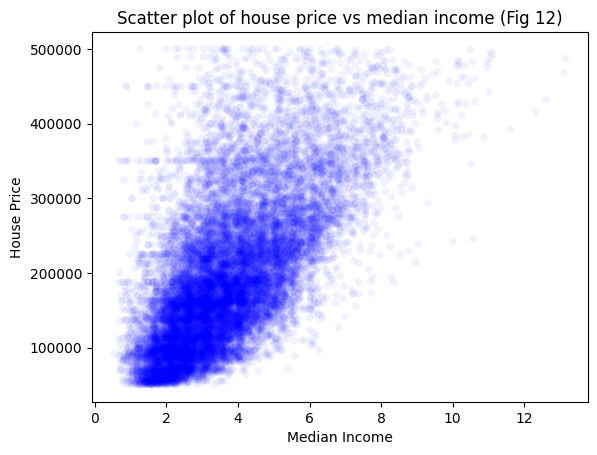

In [36]:
# scatter plot of median house price vs median income
thinkplot.Scatter(df_subset["median_income"],df_subset["median_house_value"], alpha=0.05)
thinkplot.Config(xlabel="Median Income",ylabel="House Price",title="Scatter plot of house price vs median income (Fig 12)")

In [37]:
# calculate Pearson's coefficient
scipy.stats.pearsonr(df_subset["median_income"],df_subset["median_house_value"])

PearsonRResult(statistic=0.6449393479233861, pvalue=0.0)

In [38]:
# calculate Spearman's rank coeeficient
scipy.stats.spearmanr(df_subset["median_income"],df_subset["median_house_value"])

SignificanceResult(statistic=0.6479456354584489, pvalue=0.0)

We see that _correlation coefficient_ is around $0.64$ for both Pearson's r coefficient and Spearman's rank coefficient. Therefore, we can say that there is a _substantial positive_ correlation between median income and median housing value. Median housing value tends to _increase_ as the median income of a block increases. There is a statistically significant linear relationship as Pearson's coefficient and Spearman's rank coefficient have similar values.

Even though there is a substantial _correlation_ between median house price and median income, we cannot say that the effect of an increase in house value is _caused_ by higher income. We cannot conclude the cause-effect based on correlation analysis between variables. Other methods, like randomized experiments, need to be performed to identify _causation_.

In [39]:
# Authors function to calculate Covariance
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [40]:
# Calculate covariance between median income and median house value
Cov(df_subset["median_income"],df_subset["median_house_value"])

96489.38263334356

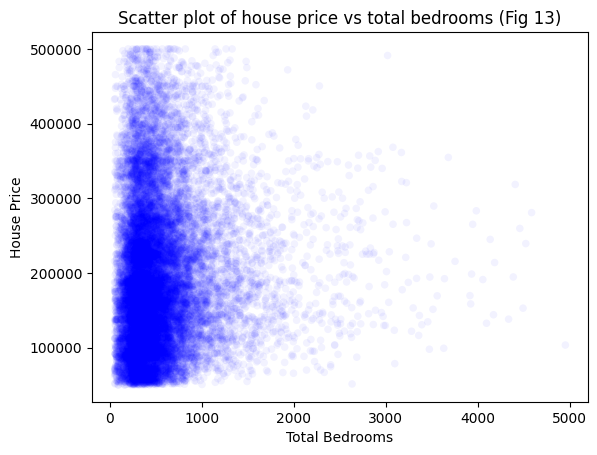

In [41]:
# create scatter plot of house price vs total bedrooms
thinkplot.Scatter(df_subset["total_bedrooms"],df_subset["median_house_value"], alpha=0.05)
thinkplot.Config(xlabel="Total Bedrooms",ylabel="House Price",title="Scatter plot of house price vs total bedrooms (Fig 13)")

In [42]:
# calculate Pearson's r coefficient
scipy.stats.pearsonr(df_subset["total_bedrooms"],df_subset["median_house_value"])

PearsonRResult(statistic=0.06802888009781133, pvalue=6.237526685957307e-21)

In [43]:
# calculate Spearman's rank coeeficient
scipy.stats.spearmanr(df_subset["total_bedrooms"],df_subset["median_house_value"])

SignificanceResult(statistic=0.09608177107098498, pvalue=3.3779035943252894e-40)

Pearson's and spearman's rank correlation is different, which may indicate the presence of a _non linear_ relationship between total bedrooms and house prices. Both the correlation coefficients are low, indicating the absence of any noticeable linear relationship.

In [44]:
# Calculate covariance between total bedrooms and median house value
Cov(df_subset["total_bedrooms"],df_subset["median_house_value"])

2664644.0098528033

#### Hypothesis test

In [45]:
# Function that runs hypothesis testing using author's hypotheis module
def run_hypothesis_tests(n, df, iters=1000):
    near_ocean = df[df["ocean_proximity"] == "NEAR OCEAN"]
    inland = df[df["ocean_proximity"] == "INLAND"]
    
    # Tesing difference in means of Housing Value
    group1, group2 = near_ocean["median_house_value"].values, inland["median_house_value"].values
    ht = hypothesis.DiffMeansPermute((group1, group2))
    p_means_value = ht.PValue(iters=iters)
    
    print(f"Sample size\tMeans(housing price)")
    print(f"{n}\t\t{p_means_value:.3f}")
    

In [46]:
# Run the various tests using multiple values of n (samplesize)
# start with full sample and reduce to half in every run until 1000 samples left
n = len(df_subset)
# run_hypothesis_tests(n,data)
while n >= 1000:
    data = thinkstats2.SampleRows(df_subset, int(n))
    run_hypothesis_tests(n,data)
    n = n//2

Sample size	Means(housing price)
18994		0.000
Sample size	Means(housing price)
9497		0.000
Sample size	Means(housing price)
4748		0.000
Sample size	Means(housing price)
2374		0.000
Sample size	Means(housing price)
1187		0.000


From the above hypothesis test, we see that the difference in mean of house prices between inland and near ocean is significant at $0.05$ significance level. Therefore, we can say that this difference in mean house price did not occur by chance in the sample data and we can expect to see the same effect in the population.

#### Linear Regression model

In [47]:
# Check the types of category in ocean proximity column
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [48]:
# Fit a model using only median income variable
model_lr1 = smf.ols('median_house_value ~ median_income', data=df_subset)
results_lr1 = model_lr1.fit()

In [49]:
# get model summary
results_lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                 1.353e+04
Date:                Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:08:42   Log-Likelihood:            -2.3992e+05
No. Observations:               18994   AIC:                         4.798e+05
Df Residuals:                   18992   BIC:                         4.799e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.454e+04   1393.890     31.955      0.000    4.18e+04    4.73e+04
median_income  4.047e+04    348.012    116.300      0.000    3.98e+04    4.12e+04
==============================================================================
Omnibus:                     3399.655   Durbin-Watson:                   0.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6409.806
Skew:                           1.113   Prob(JB):                         0.00
Kurtosis:                       4.774   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The $R^2$ (_goodness of fit_) is $0.416$, and the estimated parameters are statistically significant as the p-value of the estimated parameters is less than 0.05. The `median income` variables can account for $41.6$% of the variance in house price.

In [50]:
# Fit a model using all median income and ocean proximity variable
model_lr2 = smf.ols('median_house_value ~  C(ocean_proximity) + median_income', data=df_subset)
results_lr2 = model_lr2.fit()

In [51]:
# get model summary
results_lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     4742.
Date:                Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:08:42   Log-Likelihood:            -2.3733e+05
No. Observations:               18994   AIC:                         4.747e+05
Df Residuals:                   18988   BIC:                         4.747e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         8.102e+04   1430.406     56.641      0.000    7.82e+04    8.38e+04
C(ocean_proximity)[T.INLAND]     -7.162e+04   1109.919    -64.524      0.000   -7.38e+04   -6.94e+04
C(ocean_proximity)[T.ISLAND]       2.01e+05   2.89e+04      6.953      0.000    1.44e+05    2.58e+05
C(ocean_proximity)[T.NEAR BAY]    1.684e+04   1596.521     10.550      0.000    1.37e+04       2e+04
C(ocean_proximity)[T.NEAR OCEAN]  1.578e+04   1503.400     10.494      0.000    1.28e+04    1.87e+04
median_income                     3.585e+04    311.325    115.142      0.000    3.52e+04    3.65e+04
==============================================================================
Omnibus:                     3935.924   Durbin-Watson:                   0.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8744.628
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       5.318   Cond. No.                         254.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The $R^2$ (_goodness of fit_) is $0.555$, and the estimated parameters are statistically significant as the p-value of the estimated parameters is less than 0.05. We can say that the _linear regression_ model is a better fit. The `ocean proximity` and `median income` variables can account for $55.5$% of the variance in house price.

In both the models, $R^2$  and the _Adjusted_ $R^2$ are same, so we can say that the models are fair fit to the data. However, we see that the _AIC_ and _BIC_ is reduced in the second model indicating a better fit.

### Summary

###### Statistical/Hypothetical Question

Houses that are near to the oceanfront provide scenic views, aesthetical appeal to buyers, more opportunities for recreation, relaxing, and enjoyable lifestyle. Therefore, it is highly likely that house price near ocean may be higher. This study is focused on analyzing the hypothesis that _the price of houses located inland are lower than houses near the ocean_.

###### Outcome of EDA

The histograms (Fig 1 through 5) show that the `median housing age` variable is multimodal and the `median house value` variable is right skewed. The analysis also indicates `median income`, `median house value`, and `total rooms` variables may have some probable outliers. PMF plots (Figs. 6 and 7) show that the price of inland houses tends to be lower than the price of near-ocean houses. CDF plot (Fig 8) of house value for _inland_ and _near ocean_ categories clearly shows that the _inland_ house prices tend to be much lower than those in _near ocean_ blocks. From the CDF plots (Fig 10), we noticed that log-normal distribution is a moderately good fit for the house price data within two standard deviations of the mean, but it is not a good fit in the tails. The normal probability plot also shows this same finding. 
We see a substantial positive correlation between `income` and `housing value`, statistically significant based on the p-value. No noticeable correlation and linear relationship exist between `total rooms` and `house value` variables. _Spearmans rank_ and _Pearson_ correlation for `total rooms` and `house prices` have different values, which may indicate the presence of a non-linear relationship between these variables. The _hypothesis test_ for the difference in the mean of house prices between inland and near ocean shows that the difference in means is _statistically significant and does not just occur by chance_.

In this study, two Linear square models were fitted for the house price. One uses only `income`, and the other uses `ocean_proximity` and `income` as predictor variables. The estimated parameters are statistically significant in both the models. However, The $R^2$ ($0.555$) value is higher, and AIC/BIC value is lower when using `ocean proximity` along with `median income` variable. This shows the model is a better fit when using both the `ocean proximity` and `median income` variables and can explain more variance in the house prices than the model that uses only the `median income`.

###### What do you feel was missed during the analysis?

This study was performed using variables that mainly explain the characteristics of a house, like house age, house location, total rooms, and total bedrooms. However, there may be other socio-economic and demographic factors that can affect the value of houses in an area. It would have been good to include such factors in the analysis. ANOVA could have been an excellent way to analyze the variance of house prices with the explanatory variables. We have used linear regression to fit a model for the prediction of house prices. We have only used $R^2$ to evaluate the model's fit, but we could have further used residuals plots to check for other model characteristics like normality and homoscedasticity. Other predictive modeling like Bayesian linear regression or deep learning models could have been used and evaluated for a better fit for the prediction of house prices.

###### Were there any variables you felt could have helped in the analysis?

Some other variables might impact the difference in house value between inland and near ocean blocks. Variables like proximity to a central metropolitan city, crime rate, schooling district, etc., can significantly impact house value in an area. The longitude and latitude variables might have also helped to explain the difference in mean if these were included in explanatory variables and were part of the analysis.

###### Were there any assumptions made you felt were incorrect?

Some assumptions were made while identifying the outliers. Blocks with total rooms greater than 25K were considered outliers for this analysis. Blocks with total bedrooms below 50 rooms were considered outliers for this study. Blocks with a median house value below 50K and blocks with a median income less than 5K were considered outliers. These blocks that were considered outliers were dropped from this study. This assumption may not accurately represent the population, and dropping these records might have also cut out relevant information in other columns.

###### What challenges did you face, what did you not fully understand?

Identifying a dataset to address the research question was challenging and needed exhaustive exploration to locate open data sources to meet the needs. It would have been better to understand other _hypothesis_ test statistics like the chi-squared test or proportion test in much more detail and investigate if those test statistics would have been a better choice for this study. _Thinkstats_ and _Thinkplots_ modules have been used for analysis. These modules provide an abstract layer of the programmatic implementation of the statistical method. Understanding the underlying details of implementing the statistical techniques along with this study would have been better. Identifying the right number of explanatory variables to fit a linear regression model for predicting ocean proximity was challenging. We used _pseudo_ $R^2$ as the value to interpret the better fit. However, there might be more to do than just identifying the best fit of the model.

### References

California Housing Prices (n.d.)._Kaggle_. **https://www.kaggle.com/datasets/camnugent/california-housing-prices**

In [45]:
!pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



                                              0.0/294.9 kB ? eta -:--:--
     ------------------------------------   286.7/294.9 kB 8.9 MB/s eta 0:00:01
     -------------------------------------- 294.9/294.9 kB 4.6 MB/s eta 0:00:00


In [61]:
!pip install plotly

                                              0.0/15.7 MB ? eta -:--:--
                                              0.3/15.7 MB 6.1 MB/s eta 0:00:03
     ------                                   2.4/15.7 MB 30.5 MB/s eta 0:00:01
     --------------                           5.8/15.7 MB 46.0 MB/s eta 0:00:01
     ------------------------                10.0/15.7 MB 58.2 MB/s eta 0:00:01
     ---------------------------------       13.4/15.7 MB 81.8 MB/s eta 0:00:01
     --------------------------------------  15.7/15.7 MB 72.6 MB/s eta 0:00:01
     --------------------------------------- 15.7/15.7 MB 54.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
